In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os, cv2
import PIL
import pathlib

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

import warnings

/Users/akosaraju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


KeyboardInterrupt: 

## Data Preprocessing

In [47]:
root_path = pathlib.Path('.') / 'DataImages'
data_train = root_path / 'Train'
data_test = root_path / 'Test'

In [48]:
# seeing the number of images in our testing and training dataset
count_image_train = len(list(data_train.glob('*/*.jpg')))
count_image_test = len(list(data_test.glob('*/*.jpg')))
print(count_image_train)
print(count_image_test)

2239
118


#### Create a dataset

In [49]:
batch_size = 32
img_height = 180
img_width = 180

In [50]:
# train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_train,
                                                                    validation_split = 0.2,
                                                                    subset = "training", 
                                                                    seed = 123,
                                                                    image_size = (img_height, img_width),
                                                                    batch_size = batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [51]:
# validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_train,
                                                                          validation_split = 0.2,
                                                                          subset = "validation",
                                                                          seed = 123,
                                                                          image_size = (img_height, img_width),
                                                                          batch_size = batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [52]:
# test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_test,
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [53]:
# class list
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Data Visualization

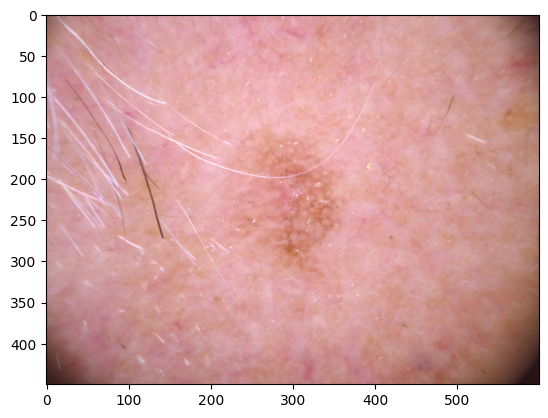

In [54]:
image = plt.imread((list(data_train.glob(class_names[0] + '/*.jpg'))[0]))
plt.imshow(image)

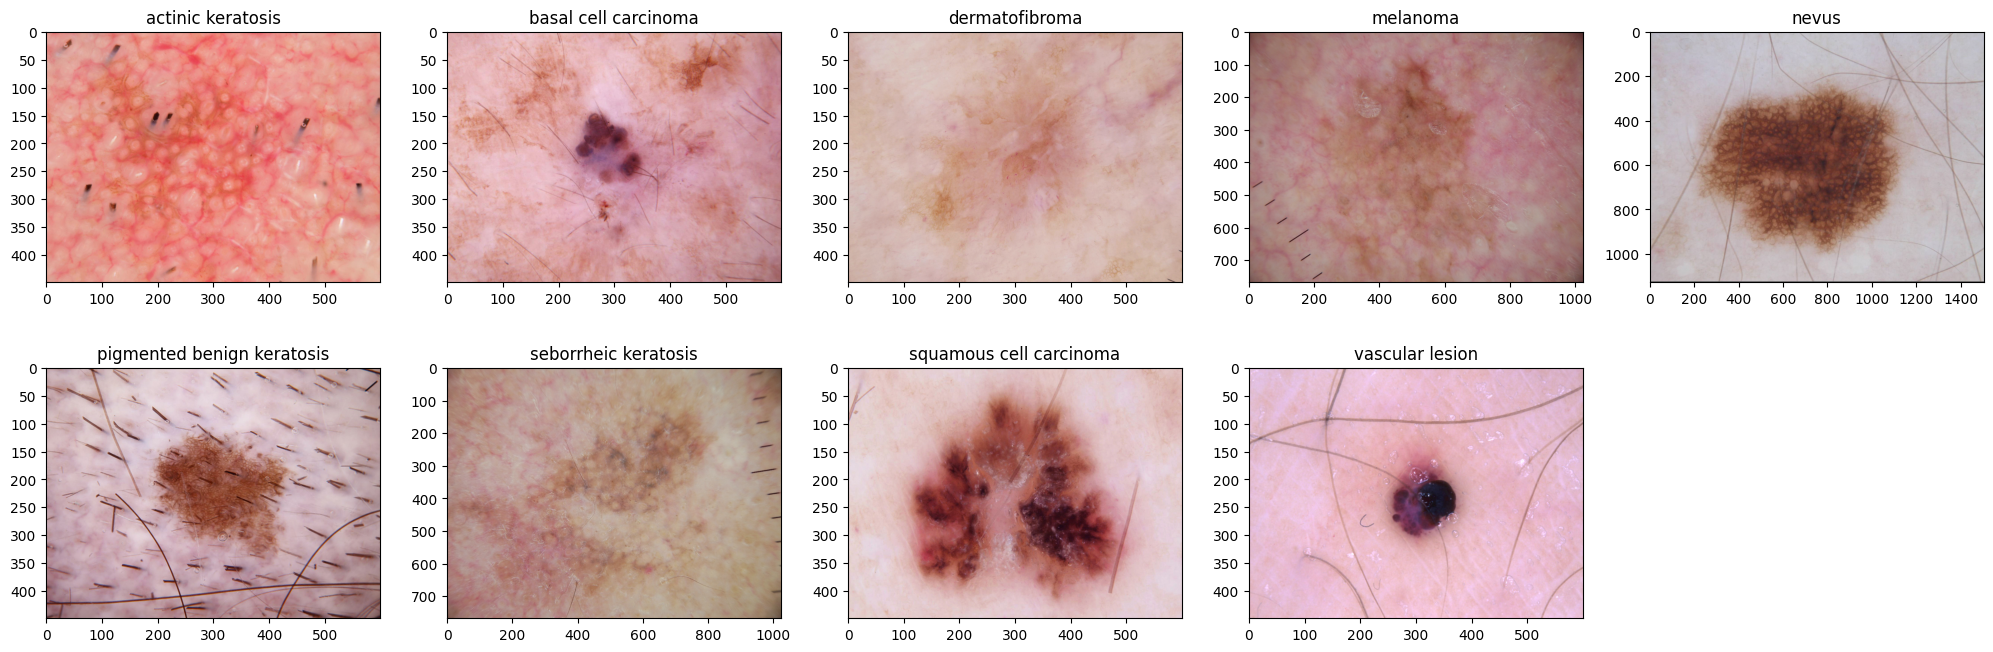

In [55]:
plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [56]:
# configure for performance
autotune = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=autotune)
test_dataset = test_dataset.cache().prefetch(buffer_size=autotune)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=autotune)


In [63]:
# create plots of the loss and accuracy on the training and vlaidation sets:
def plot_cnn_metrics(history,epochs):
    accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Building the Model 

In [58]:
# CNNmodel
model = models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [59]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 259200)           

### Model training

In [60]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of d

169/169 [==============================] - ETA: 0s - loss: 2.1382 - accuracy: 0.3411

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 7 extraneous bytes before marker 0xd9
Corr

169/169 [==============================] - 185s 1s/step - loss: 2.1382 - accuracy: 0.3411 - val_loss: 1.3344 - val_accuracy: 0.4818
Epoch 2/20
169/169 [==============================] - 167s 988ms/step - loss: 1.2900 - accuracy: 0.5274 - val_loss: 1.1865 - val_accuracy: 0.5538
Epoch 3/20
169/169 [==============================] - 164s 967ms/step - loss: 1.0149 - accuracy: 0.6346 - val_loss: 1.0543 - val_accuracy: 0.6065
Epoch 4/20
169/169 [==============================] - 186s 1s/step - loss: 0.8423 - accuracy: 0.7033 - val_loss: 0.8969 - val_accuracy: 0.6912
Epoch 5/20
169/169 [==============================] - 198s 1s/step - loss: 0.6541 - accuracy: 0.7711 - val_loss: 0.8301 - val_accuracy: 0.7134
Epoch 6/20
169/169 [==============================] - 183s 1s/step - loss: 0.5266 - accuracy: 0.8125 - val_loss: 0.8685 - val_accuracy: 0.7268
Epoch 7/20
169/169 [==============================] - 181s 1s/step - loss: 0.4935 - accuracy: 0.8344 - val_loss: 0.8172 - val_accuracy: 0.7298
Epoc

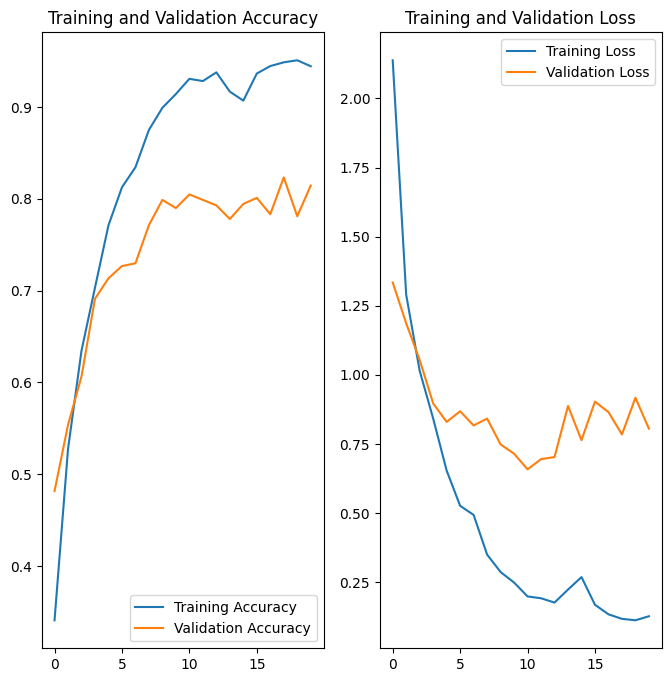

In [64]:
# visualizing trainig results
plot_cnn_metrics(history, epochs)

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Findings : </b>
        <ol>
            <li>As the training accuracy increases linearly over time, where as the validation accuracy stall at 50% accuracy in training process.</li>
            <li>As the training loss dereases with epochs the validation loss increases.</li>
            <li>The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved around <b>50%</b> accuracy on the validation set.</li>
            <li>The difference in accuracy between training and validation accuracy is <b>noticeable</b> which is a sign of overfitting.</li>
        </ol>
    </span>    
</div>

## choose an appropriate data augmentation strategy to resolve underfitting_overfitting

In [65]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

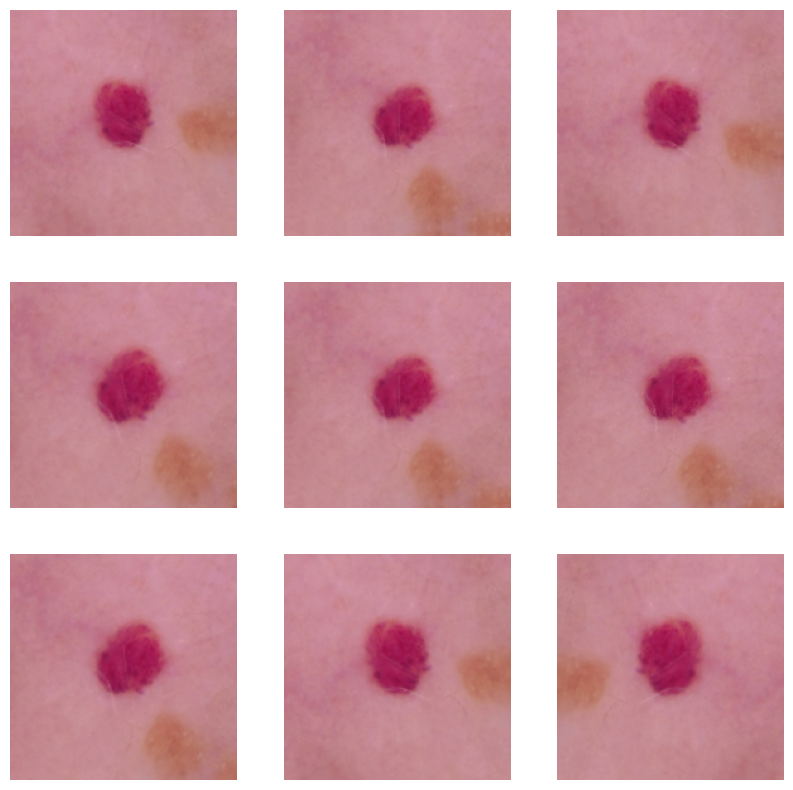

In [66]:
# visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Model Building and training on the augmented data

In [3]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

NameError: name 'models' is not defined

In [68]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [69]:
# Training the model
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 210s 1s/step - loss: 2.1133 - accuracy: 0.3375 - val_loss: 1.6677 - val_accuracy: 0.3801
Epoch 2/20
169/169 [==============================] - 199s 1s/step - loss: 1.4851 - accuracy: 0.4455 - val_loss: 1.4836 - val_accuracy: 0.4439
Epoch 3/20
169/169 [==============================] - 213s 1s/step - loss: 1.3851 - accuracy: 0.4781 - val_loss: 1.2947 - val_accuracy: 0.5108
Epoch 4/20
169/169 [==============================] - 200s 1s/step - loss: 1.3364 - accuracy: 0.4983 - val_loss: 1.2278 - val_accuracy: 0.5160
Epoch 5/20
169/169 [==============================] - 194s 1s/step - loss: 1.2289 - accuracy: 0.5352 - val_loss: 1.1709 - val_accuracy: 0.5553
Epoch 6/20
169/169 [==============================] - 257s 2s/step - loss: 1.1795 - accuracy: 0.5466 - val_loss: 1.0786 - val_accuracy: 0.5865
Epoch 7/20
169/169 [==============================] - 214s 1s/step - loss: 1.0982 - accuracy: 0.5792 - val_loss: 1.0465 - val_accuracy: 0.6154

In [ ]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Findings : </b>
        <ol>
            <li>As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.</li>
            <li>As the training loss decreases with epochs the validation loss decreases and stalls.</li>
            <li>The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around <b>55%</b> accuracy on the validation set.</li>
            <li>The difference in accuracy between training and validation accuracy is still <b>slightly noticeable</b> which is a sign of overfitting.</li>
        </ol>
    </span>    
</div>

## Model Building and training on the augmented data with dropout

In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

In [ ]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Findings : </b>
        <ol>
            <li>As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.</li>
            <li><b>As the training loss decreases with epochs the validation loss decreases</b></li>
            <li>The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around <b>55%</b> accuracy on the validation set.</li>
            <li>The difference in accuracy between training and validation accuracy is <b>very less</b></li>
        </ol>
    </span>    
</div>

we can clearly see that the overfitting of the model has been reduces significantly when compared to the earlier models

## Class distribution

In [ ]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_train.glob(class_names[i]+'/*.jpg'))))

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Findings : </b>
        <ol>
            <li>Which class has the least number of samples?<br>
            <b>seborrheic keratosis with 77 samples</b></li>
            <li>Which classes dominate the data in terms proportionate number of samples?<br>
            <b>pigmented benign keratosis with 462 samples</b></li>
        </ol>
    </span>    
</div>

## Handling class imbalances

In [ ]:
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
path_to_training_dataset = "./DataImages/train/"
output_base_directory = "./augmented_data/"
import Augmentor

for i in class_names:
    source_directory = os.path.join(path_to_training_dataset, i)
    output_directory = os.path.join(output_base_directory, i)
    try:
        # Attempt to create Augmentor pipeline
        p = Augmentor.Pipeline(source_directory, output_directory=output_directory)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)  # Add 500 augmented samples per class to make sure none of the classes are sparse

    except Exception as e:
        print(f"Error creating Augmentor pipeline: {e}")


Initialised with 0 image(s) found.
Output directory set to ./DataImages/train/actinic keratosis/./augmented_data/actinic keratosis.Error creating Augmentor pipeline: There are no images in the pipeline. Add a directory using add_directory(), pointing it to a directory containing images.
Initialised with 0 image(s) found.
Output directory set to ./DataImages/train/basal cell carcinoma/./augmented_data/basal cell carcinoma.Error creating Augmentor pipeline: There are no images in the pipeline. Add a directory using add_directory(), pointing it to a directory containing images.
Initialised with 95 image(s) found.
Output directory set to ./DataImages/train/dermatofibroma/./augmented_data/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14496FA00>: 100%|██████████| 500/500 [00:02<00:00, 226.96 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to ./DataImages/train/melanoma/./augmented_data/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x144B8E1F0>: 100%|██████████| 500/500 [00:09<00:00, 50.33 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to ./DataImages/train/nevus/./augmented_data/nevus.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x144956280>: 100%|██████████| 500/500 [00:10<00:00, 46.44 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to ./DataImages/train/pigmented benign keratosis/./augmented_data/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x144B23640>: 100%|██████████| 500/500 [00:02<00:00, 217.60 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to ./DataImages/train/seborrheic keratosis/./augmented_data/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x144B7BE50>: 100%|██████████| 500/500 [00:04<00:00, 104.49 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./DataImages/train/squamous cell carcinoma/./augmented_data/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x144B878B0>: 100%|██████████| 500/500 [00:02<00:00, 206.08 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to ./DataImages/train/vascular lesion/./augmented_data/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1449D1640>: 100%|██████████| 500/500 [00:02<00:00, 236.84 Samples/s]                  


In [ ]:
data_train = pathlib.Path("./DataImages/train/")
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)

2239


let us see the distribution of augmented data after adding new images to the origincal training data

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_train, '*', '*.jpg'))]

In [ ]:
new_dict = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(new_dict.items()),columns = ['Path','Label'])

In [ ]:
df['Label'].value_counts()

In [ ]:
# initializing the parameter to load the images
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

## model building and trainig on the rectified class imbalance data

In [2]:
# CNN Model
model=model.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

NameError: name 'model' is not defined

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

In [ ]:
# Training the model
epochs = 30
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

In [ ]:
# Visualizing model results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Findings : </b>
        <ol>
            <li>As the training accuracy increases linearly over time, where as the validation accuracy increases in training process.</li>
            <li>As the training loss decreases with epochs the validation loss also decreases.</li>
            <li>The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around <b>75%</b> accuracy on the validation set.</li>
            <li>The difference in accuracy between training and validation accuracy is <b>very less</b></li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <p>Class rebalancing not only got rid of overfitting it also improved the accuracy from 55% to 75%.</p>  
    </span>    
</div>